<a href="https://colab.research.google.com/github/rajy4683/S11EVA4/blob/master/S11EVA4_CLR6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Apr 11 16:21:07 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Downloading and installing dependencies from the GitHub link:


In [0]:
#!git clone https://github.com/rajy4683/RekogNizer.git /content/drive/My\ Drive/EVA4/RekogNizer

In [3]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

     |████████████████████████████████| 112kB 1.4MB/s 
     |████████████████████████████████| 1.4MB 4.4MB/s 
     |████████████████████████████████| 102kB 6.1MB/s 
     |████████████████████████████████| 102kB 6.1MB/s 
     |████████████████████████████████| 460kB 8.4MB/s 
     |████████████████████████████████| 112kB 11.7MB/s 
     |████████████████████████████████| 634kB 9.7MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=c32cb6453d01881f6ec29e48d0739cdad92c802cd93880cc62562ecd09929ab5
  Stored in directory: /root/.cache/pip/wheels/ce/0e/7b/58a8a5268655b3ad74feef5aa97946f0addafb3cbb6bd2da23
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=65a345290f7656584e898800ea1a65abd9b8cc6532b71618918e32a15b7a13dd
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f

In [4]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-ibphsba_
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-ibphsba_
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=261248aba23cc0571ffb4ecf29b0bd51607367c26578828d9b8236b52de145b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-6k_8bvue/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


#### WANDB client login

In [5]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/')
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')

### RandomCrop + Fliplr + Cutout

In [0]:
%load_ext autoreload

In [0]:
%autoreload 2
from RekogNizer import lrfinder
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader

from torchsummary import summary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize, Cutout, MotionBlur
from albumentations import (
    HorizontalFlip, Compose, RandomCrop, Cutout,Normalize, HorizontalFlip, RandomBrightnessContrast,
    Resize,RandomSizedCrop, MotionBlur,MultiplicativeNoise,InvertImg,PadIfNeeded,Flip, IAAFliplr,
)
from albumentations.pytorch import ToTensor


from RekogNizer import hyperparams
# hyper_param_values = {
#                       "lr":0.21694816106338752,
#                       "dropout":0.1, 
#                       "momentum":0.7062620648684866, 
#                       "epochs":100, 
#                       "weight_decay":0.00015753761358641488
#                       }
#hyperparams.set_hyperparam(hyper_param_values)
torch.manual_seed(hyperparams.hyperparameter_defaults['seed'])    


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


torch.Size([512, 3, 32, 32]) tensor([-0.0361, -0.0359, -0.0299]) tensor([0.9864, 0.9848, 0.9672])


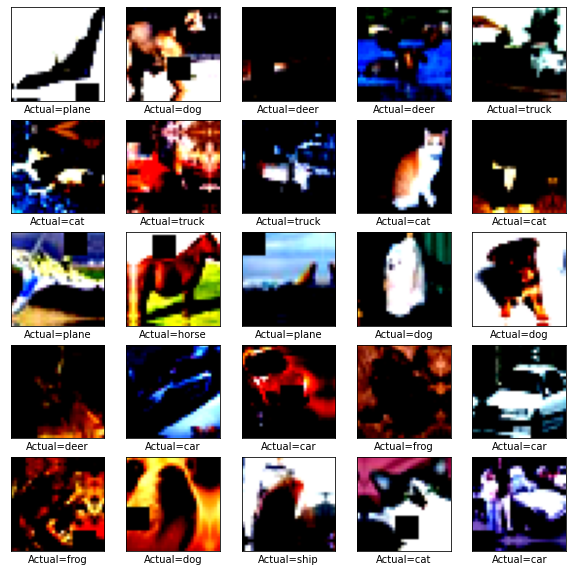

In [0]:
transform_train = Compose([
    #Cutout(num_holes=1,max_h_size=16,max_w_size=16,always_apply=True,p=1,fill_value=[0.5268*255, 0.5267*255, 0.5328*255]),
    PadIfNeeded(min_height=40,min_width=40, always_apply=True, p=1.0),
    RandomCrop(height=32,width=32, p=1),
    #Flip(p=0.5),
    IAAFliplr(p=0.5),
    Cutout(num_holes=1,max_h_size=8,max_w_size=8,always_apply=True,p=1,fill_value=[0.4914*255, 0.4826*255, 0.44653*255]),
    Normalize(
      mean=[0.4914, 0.4826, 0.44653],
      std=[0.24703, 0.24349, 0.26519],
      ),
    # Normalize(
    #    mean=[0.5268, 0.5267, 0.5328],
    #    std=[0.3485, 0.3444, 0.3447],
    #    ),
    
    ToTensor()
    ])
trainloader, testloader = dataloader.get_train_test_dataloader_cifar10(transform_train=transform_train)

torch.manual_seed(1)
dataiter = iter(trainloader)
images, labels = dataiter.next()

fileutils.show_sample_images(images,labels, dataloader.classes)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
 ModifiedResBlock-14          [-1, 128,

Epoch:1.0 val_acc:31.6 loss:1.9354213958740234 lr:0.031070628777110833 
Epoch:2.0 val_acc:40.48 loss:1.6808999074935913 lr:0.032179465753500926 
Epoch:3.0 val_acc:52.96 loss:1.34903500289917 lr:0.03332787448909262 
Epoch:4.0 val_acc:56.39 loss:1.2787883840560914 lr:0.03451726720602463 
Epoch:5.0 val_acc:63.24 loss:1.0959933629989624 lr:0.035749106525291105 
Epoch:6.0 val_acc:67.38 loss:0.9461504789352417 lr:0.03702490726535702 
Epoch:7.0 val_acc:72.08 loss:0.8861343712806702 lr:0.03834623830496205 
Epoch:8.0 val_acc:72.25 loss:0.8257036808013916 lr:0.03971472451240346 
Epoch:9.0 val_acc:76.19 loss:0.7098297559738159 lr:0.0411320487436704 
Epoch:10.0 val_acc:76.96 loss:0.6942090656280517 lr:0.042599953911887034 
Epoch:11.0 val_acc:80.56 loss:0.5900561586380005 lr:0.04412024513060909 
Epoch:12.0 val_acc:78.8 loss:0.6611770466804504 lr:0.045694791933609556 
Epoch:13.0 val_acc:79.36 loss:0.66877418384552 lr:0.047325530573883376 
Epoch:14.0 val_acc:81.14 loss:0.5991976720809936 lr:0.0490144

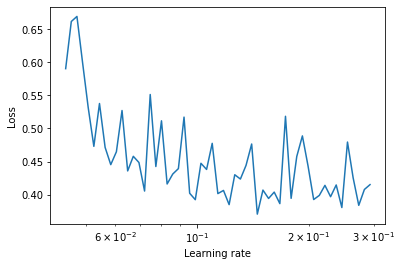

In [0]:
%autoreload 1
from RekogNizer import dataloader
from RekogNizer import traintest
from RekogNizer import basemodelclass
#model_new = basemodelclass.ResNet18(hyperparams.hyperparameter_defaults['dropout'])
model_new = basemodelclass.S11ResNet()
summary(model_new.to(torch.device("cuda")),input_size=(3, 32, 32))


torch.manual_seed(1)
criterion = nn.CrossEntropyLoss()
##3.279445101495624
#0.30585674609910773
#optimizer = optim.SGD(model_new.parameters(), lr=0.279445101495624, weight_decay=0.00020996378493752516,momentum=0.42786879879874073)#-->89.43


optimizer = optim.SGD(model_new.parameters(), lr=0.0000279445101495624, weight_decay=0.0,momentum=0.85)

#traintest.find_lr_type1(model_new, optimizer, criterion, trainloader, seed=1)
lr_finder = traintest.find_lr_type1(model_new, optimizer, criterion, 
                                    trainloader, testloader=testloader, 
                                    seed=1,num_iter=10000,
                                    start_lr=0.03,end_lr=1, step_mode='linear')

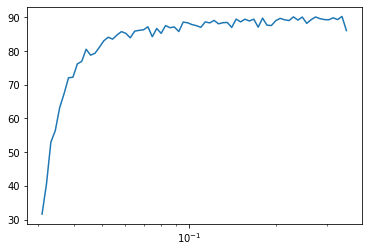

In [0]:
lrs = lr_finder.history['lr']
acc = lr_finder.history['val_acc']
#plt.plot(acc, np.arange(len(acc)))

plt.plot(lrs,acc)#,lrs)
plt.xscale("log")
#plt.xlabel("Learning rate")
#plt.ylabel("acc")

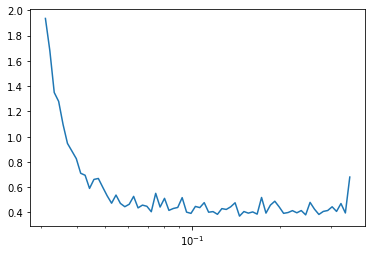

In [0]:
lrs = lr_finder.history['lr']
acc = lr_finder.history['loss']
#plt.plot(acc, np.arange(len(acc)))

plt.plot(lrs,acc)#,lrs)
plt.xscale("log")
#plt.xlabel("Learning rate")
#plt.ylabel("acc")

In [0]:
lr_finder.history.pop('acc')
df_lrf = pd.DataFrame(lr_finder.history)

In [0]:
df_lrf.describe()

,lr,loss,val_acc
count,70.000000,70.000000,70.000000
mean,0.132356,0.553262,83.485143
std,0.090200,0.292335,11.100667
min,0.031071,0.370778,31.600000
25%,0.056898,0.407237,84.165000
50%,0.104186,0.444979,87.395000
75%,0.190761,0.530244,89.110000
max,0.349250,1.935421,90.300000


### Without Momentum Cycling

```
# This is formatted as code
```



In [0]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_s11_new.py -p '{"lr":0.015084, "ocp_max_lr":0.22929306888027964, "anneal_strategy":"linear","div_factor":128,"final_div_factor":64, "momentum":0.85, "epochs":24, "weight_decay":0.000000,"batch_size":512}'

  pip install torch-lr-finder -v --global-option="amp"
Setting  lr  =  0.015084
Setting  ocp_max_lr  =  0.22929306888027964
Setting  anneal_strategy  =  linear
Setting  div_factor  =  128
Setting  final_div_factor  =  64
Setting  momentum  =  0.85
Setting  epochs  =  24
Setting  weight_decay  =  0.0
Setting  batch_size  =  512
Final Hyperparameters
             dropout : 0.1 
          batch_size : 512 
     test_batch_size : 128 
                  lr : 0.015084 
            momentum : 0.85 
             no_cuda : False 
                seed : 1 
              epochs : 24 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
          ocp_max_lr : 0.22929306888027964 
    final_div_factor : 64 
          div_factor : 128 
     anneal_strategy : linear 
           pct_start : 0.208 
      cycle_momentum : False 
Files 

### With Momentum Cycling


In [0]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_s11_new.py -p '{"lr":0.015084, "ocp_max_lr":0.22929306888027964, "anneal_strategy":"linear","div_factor":128,"final_div_factor":64, "momentum":0.85, "epochs":24, "weight_decay":0.000000,"batch_size":512,"cycle_momentum":"True"}'

  pip install torch-lr-finder -v --global-option="amp"
Setting  lr  =  0.015084
Setting  ocp_max_lr  =  0.22929306888027964
Setting  anneal_strategy  =  linear
Setting  div_factor  =  128
Setting  final_div_factor  =  64
Setting  momentum  =  0.85
Setting  epochs  =  24
Setting  weight_decay  =  0.0
Setting  batch_size  =  512
Setting  cycle_momentum  =  True
Final Hyperparameters
             dropout : 0.1 
          batch_size : 512 
     test_batch_size : 128 
                  lr : 0.015084 
            momentum : 0.85 
             no_cuda : False 
                seed : 1 
              epochs : 24 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
          ocp_max_lr : 0.22929306888027964 
    final_div_factor : 64 
          div_factor : 128 
     anneal_strategy : linear 
           pct_start : 0.208 
   

#### The APIs for inferencing and plotting are moved out of the training script.


In [0]:
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader

import pandas as pd
import numpy as np
import torch

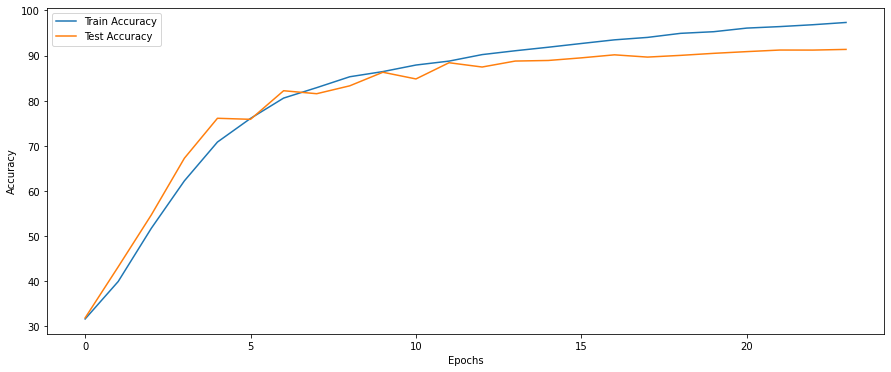

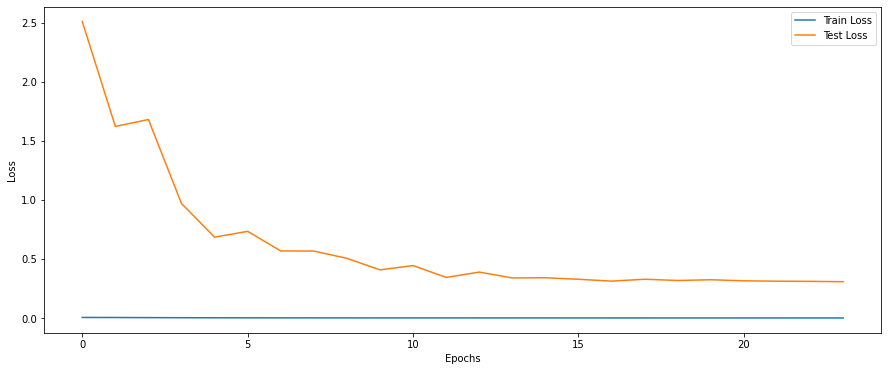

In [0]:
run_list = ['rajy4683/news5/runs/mna1bxc9']
runs_df = logger.get_wandb_dataframes(run_list=run_list)#(project="rajy4683/news5",count=1)
new_df = pd.DataFrame().append(runs_df)


fileutils.plot_graphs([new_df],
            ['Train Accuracy', 'Test Accuracy'],
            columns=['Train Accuracy', 'Test Accuracy'],
            xlabel="Epochs",
            ylabel="Accuracy")

fileutils.plot_graphs([new_df],
            ['Train Loss', 'Test Loss'],
            columns=['Train Loss', 'Test Loss'],
            xlabel="Epochs",
            ylabel="Loss")

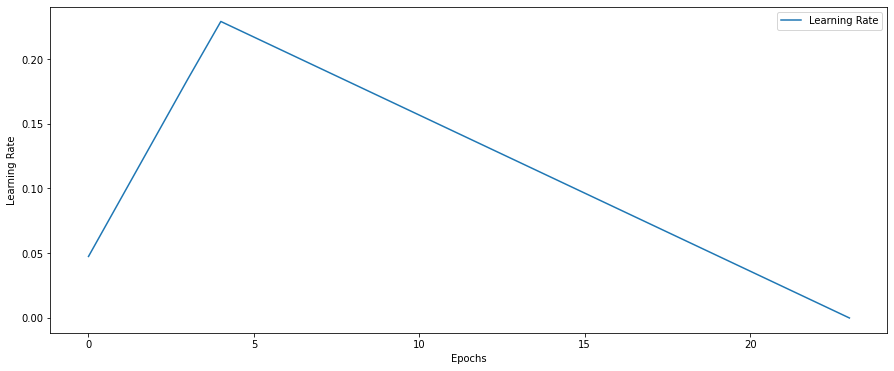

In [0]:
fileutils.plot_graphs([new_df],
            ['Learning Rate'],
            columns=['Learning Rate'],
            xlabel="Epochs",
            ylabel="Learning Rate")

In [0]:
%load_ext autoreload
%autoreload 2
from RekogNizer import traintest
import torchvision.transforms as transforms
import torchvision

#my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-23b3505819.h5")
#my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-15ad50e1bc.h5", local_device=torch.device("cpu"))
#my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-2fba2384bd.h5", local_device=torch.device("cpu"))
my_model,acc = traintest.model_builder2(basemodelclass.S11ResNet(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-151a794a20.h5", local_device=torch.device("cpu"))

#class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, classes, device=torch.device("cpu"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
from RekogNizer import hyperparams
# transform_test = transforms.Compose(
#     [transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                     download=True, transform=transform_test)
# testloader = dataloader.get_dataloader(testset, hyperparams.hyperparameter_defaults['batch_size'], shuffle=False, num_workers=2)

trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()

class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, dataloader.classes, device=torch.device("cuda"))

Files already downloaded and verified
Files already downloaded and verified
Accuracy of plane : 91 %
Accuracy of   car : 96 %
Accuracy of  bird : 89 %
Accuracy of   cat : 81 %
Accuracy of  deer : 91 %
Accuracy of   dog : 86 %
Accuracy of  frog : 93 %
Accuracy of horse : 93 %
Accuracy of  ship : 95 %
Accuracy of truck : 94 %


<BarContainer object of 10 artists>

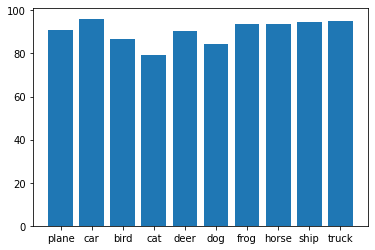

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar([key for key in class_accuracy_dict.keys()],[val for val in class_accuracy_dict.values()])

Files already downloaded and verified
Files already downloaded and verified
848
(848,)
91.52 0.2963299942016602


<Figure size 720x720 with 0 Axes>

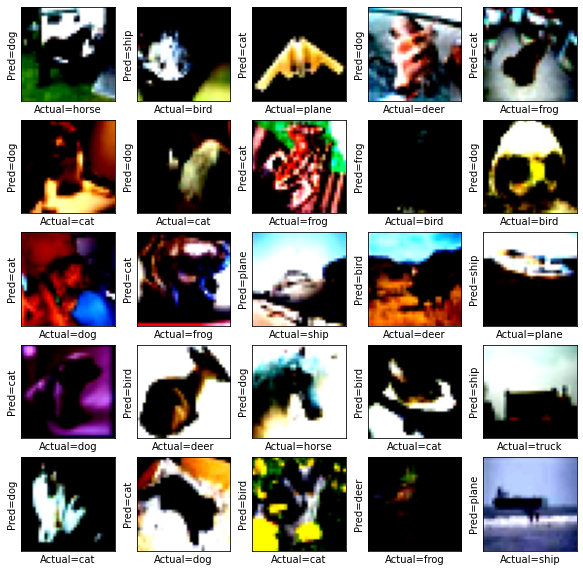

In [0]:
from RekogNizer import traintest
type(my_model)
classes = dataloader.classes
trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()
error_images, preds, actuals = traintest.show_misclassfied_images(my_model, testloader, dataloader.classes)


# GRADCAM Visualizations

In [0]:
import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision.utils import make_grid, save_image

from RekogNizer.gradcam2 import *

saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


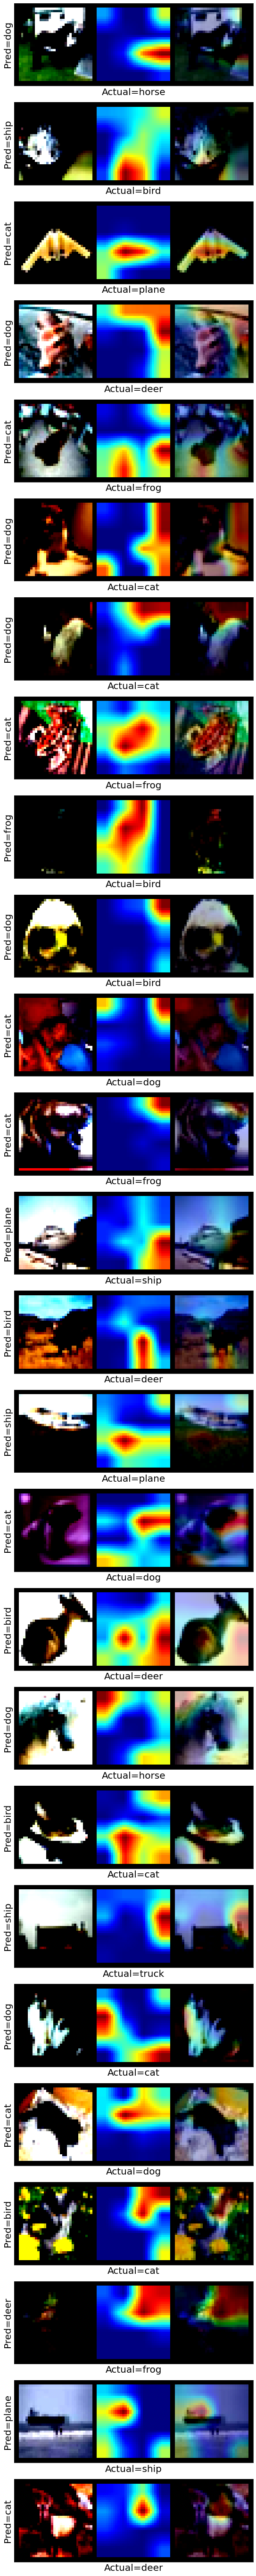

In [0]:
resnet_model_dict = dict(type='resnet', arch=my_model.to(torch.device("cpu")), layer_name='layer3', input_size=(32, 32))
mean=[0.4827, 0.4724, 0.4427]
std=[0.2482, 0.2501, 0.2698]

#classes[np.int(preds[idx])], xlabel="Actual="+classes[np.int(actuals[idx])]
classes = dataloader.classes

#gradcam_images = []
fig = plt.figure(figsize=(100,100))
idx = 0
for elem in zip(error_images[:26], actuals[:26], preds[:26]):
    ax = fig.add_subplot(26, 1, idx+1, xticks=[], yticks=[])
    idx+=1
    npimg= visualize_gradcam_image(resnet_model_dict,
                            elem[0], 
                            classes[np.int(elem[1])], 
                            classes[np.int(elem[2])], 
                            mean=mean, std=std)
    
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_xlabel(xlabel="Actual="+classes[np.int(elem[1])],fontsize=20)
    ax.set_ylabel(ylabel="Pred="+classes[np.int(elem[2])],fontsize=20)
                  #xlabel="Actual="+classes[np.int(elem[1])],fontdict=)
fig.savefig('/content/drive/My Drive/EVA4/gradcam_s10eva4.jpg')